In [9]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import matplotlib_inline
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
plt.style.use('fivethirtyeight')

In [2]:
# Creating list to append tweet data to
tweets_list_datascience = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweeti in enumerate(sntwitter.TwitterSearchScraper('data science AND programming since:2012-01-01 until:2022-01-01').get_items()):
    tweets_list_datascience.append([tweeti.date, tweeti.id, tweeti.content, tweeti.user.username])
    
# Creating a dataframe from the tweets list above
tweets_df_datascience = pd.DataFrame(tweets_list_datascience, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [5]:
tweets_df_datascience.to_csv('datascience.csv')

In [3]:
tweets_df_datascience.sort_values(by='Datetime')

,Datetime,Tweet Id,Text,Username
44797,2012-01-11 08:36:48+00:00,157018106626191360,"Computer science , programming not opening up ...",KlingKlang1968
44796,2012-01-14 02:43:55+00:00,158016462898991104,Dr. Bunsen Blog - Home - 6 Great Textbooks in ...,AnthonyNystrom
44795,2012-01-22 18:21:40+00:00,161151559038799872,R Programming for Bioinformatics (Chapman 038 ...,3kathatk
44794,2012-01-26 00:37:04+00:00,162333197659684865,"Created music in Computer Science tonight, Pur...",DasKota
44793,2012-01-30 11:56:35+00:00,163953753211420672,R Programming for Bioinformatics (Chapman 038 ...,nhimaitf
...,...,...,...,...
4,2021-12-31 20:34:03+00:00,1477015216433029126,PYTHON: Learn Coding Programs with Python Prog...,pythonbot_
3,2021-12-31 23:04:56+00:00,1477053184367640578,In all jobs that do some form of scientific co...,chocogammamon
2,2021-12-31 23:11:04+00:00,1477054727921672192,RT 6 Helpful Tips for Acing Your Data Science ...,DrMattCrowson
1,2021-12-31 23:18:46+00:00,1477056665988079625,6 Helpful Tips for Acing Your Data Science Int...,labvault


<AxesSubplot:>

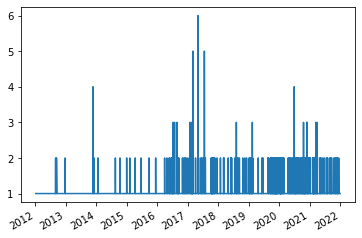

In [4]:
%matplotlib inline

tweets_df_datascience['Datetime'].value_counts().plot()

In [10]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+', '', text)

    return text

tweets_df_datascience['Tweets'] = tweets_df_datascience['Text'].apply(cleanText)

In [13]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
tweets_df_datascience['Subjectivity'] = tweets_df_datascience['Tweets'].apply(getSubjectivity)

In [14]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
tweets_df_datascience['Polarity'] = tweets_df_datascience['Tweets'].apply(getPolarity)

In [15]:
tweets_df_datascience

,Datetime,Tweet Id,Text,Username,Tweets,Subjectivity,Polarity
0,2021-12-31 23:43:10+00:00,1477062805757079557,2022 goals: \n- get a haircut \n- workout hard...,coldfridge22,2022 goals: \n- get a haircut \n- workout hard...,0.38,0.110000
1,2021-12-31 23:18:46+00:00,1477056665988079625,6 Helpful Tips for Acing Your Data Science Int...,labvault,6 Helpful Tips for Acing Your Data Science Int...,0.00,0.000000
2,2021-12-31 23:11:04+00:00,1477054727921672192,RT 6 Helpful Tips for Acing Your Data Science ...,DrMattCrowson,6 Helpful Tips for Acing Your Data Science Int...,0.00,0.000000
3,2021-12-31 23:04:56+00:00,1477053184367640578,In all jobs that do some form of scientific co...,chocogammamon,In all jobs that do some form of scientific co...,0.00,0.000000
4,2021-12-31 20:34:03+00:00,1477015216433029126,PYTHON: Learn Coding Programs with Python Prog...,pythonbot_,PYTHON: Learn Coding Programs with Python Prog...,0.40,0.100000
...,...,...,...,...,...,...,...
44793,2012-01-30 11:56:35+00:00,163953753211420672,R Programming for Bioinformatics (Chapman 038 ...,nhimaitf,R Programming for Bioinformatics (Chapman 038 ...,0.00,0.000000
44794,2012-01-26 00:37:04+00:00,162333197659684865,"Created music in Computer Science tonight, Pur...",DasKota,"Created music in Computer Science tonight, Pur...",0.70,0.407143
44795,2012-01-22 18:21:40+00:00,161151559038799872,R Programming for Bioinformatics (Chapman 038 ...,3kathatk,R Programming for Bioinformatics (Chapman 038 ...,0.00,0.000000
44796,2012-01-14 02:43:55+00:00,158016462898991104,Dr. Bunsen Blog - Home - 6 Great Textbooks in ...,AnthonyNystrom,Dr. Bunsen Blog - Home - 6 Great Textbooks in ...,0.75,0.800000


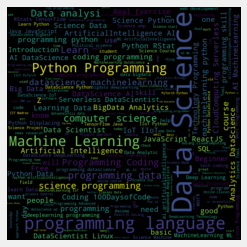

In [16]:
wordy = ' '.join( [tweets for tweets in tweets_df_datascience['Tweets']] )
cloud = WordCloud(width = 1000, height = 1000, random_state = 22, max_font_size=120).generate(wordy)

plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [18]:
plt.figure(figsize=(8,6))
for i in range(0, tweets_df_datascience.shape[0]):
    plt.scatter(tweets_df_datascience['Polarity'][i], tweets_df_datascience['Subjectivity'][i], color='Green')

plt.title('Data Science Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000243B3B72AF0> (for post_execute):


KeyboardInterrupt: 